## Final Project: JOUR 561

#### EXPLORING EARTHQUAKE HAZARDS AND RISK IN LOS ANGELES

For this project, I will use multiple kinds of data to visualize the hazards and risks due to earthquakes in LA County. I will use both the aggregation and analysis that we have learnt in class to understand and analyse the data, and I will create maps to visualize this analysis.

I will mostly use the quaternary faults data from LA County, liquefaction zones data, locations of soft-story houses and some race and economic datasets in LA County to conduct my research. 


The analysis part is small and the main focus is on the charts and maps, but I wanted this to be a culmination of what we have learnt throughout the semester, so I demonstrate the use of Groupbys quite a lot, some sorting and basic data analysis + cleaning, and visualizations through charts and maps. So, this final project consists of all three elements: a notebook with some analysis, some Altair charts and some QGIS and Datawrapper maps. 

In [263]:
%load_ext lab_black
import pandas as pd
import geopandas as gpd
import altair as alt

pd.options.display.max_columns = 100
pd.options.display.max_rows = 1000
pd.options.display.max_colwidth = None

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


#### Part I: Importing Datasets

In [264]:
liquefaction = gpd.read_file("../data/geo/Liquefaction_zones.geojson")

**WHAT THIS DATASET IS**: The shapefile for areas that are under risk of liquefaction in LA county.

**HOW WILL IT BE USED**: I want to make a map with it in QGIS. I tried doing that and the map isn't perfect, so it will be one of the maps that I use for my analysis here. It is mostly there to visualize the zones that are most in danger from liquefaction in case of an earthquake. Liquefaction is a sort of 'liquifying' of the ground after an earthquake, such that the ground acts like quick sand. It can be bad enough that the ground can start swallowing up buildings. Usually happens in areas that have a good amount of underground water.

In [265]:
fault_trace = gpd.read_file("../data/geo/Fault_Trace.geojson")

**WHAT THIS DATASET IS**: The shapefile for faults in LA county.

**HOW WILL IT BE USED**: Similar to the above dataset, I just want to put this in a map to visualize the areas that are most in danger. 

In [266]:
concrete_buildings = pd.read_csv("../data/raw/la_concrete_buildings.csv")
concrete_buildings.head()

,num,lat,lon,address,zip_code,building_name,occupancy,code,stories,yrblt,sqft,hazus,level,bldvalue,adjvalue,multiplier,contents,combined,day,night,assessor,Type,Update
0,1,34.03616,-118.26004,100 E PICO BLVD,90015,NaN,Industrial,IND2,2,1946.0,12690,C2L,PC,936776,2402362,1.5,3603542,6005904,63,4,C5B,NaN,NaN
1,2,34.03134,-118.22999,1000 S SANTA FE AVE,90021,NaN,Industrial,IND2,5,1917.0,62060,C2M,PC,4878537,12511007,1.5,18766511,31277518,310,19,CX,NaN,NaN
2,3,34.03594,-118.25172,1001 S SAN PEDRO ST,90015,NaN,Industrial,COM2,2,1909.0,9516,C2L,PC,538415,1380766,1.0,1380766,2761532,10,0,CX,NaN,NaN
3,4,34.03594,-118.25172,1001 S SAN PEDRO ST,90015,NaN,Industrial,COM2,2,1911.0,9764,C2L,PC,552447,1416751,1.0,1416751,2833501,10,0,CX,NaN,NaN
4,5,34.03594,-118.25172,1001 S SAN PEDRO ST,90015,NaN,Industrial,COM2,2,1914.0,14120,C2L,PC,798910,2048804,1.0,2048804,4097607,14,0,CX,NaN,NaN


**WHAT THIS DATASET IS**: Contains data for all the concrete buildings in Los Angeles that are in danger from damage during earthquakes.

**HOW WILL IT BE USED**: Some data analysis for what regions are most in danger from huge economic losses and damages if there is an earthquake. I will look at the height of the buildings to estimate the amount of risk––not only the number of stories but also the HAZUS building type label, under the 'hazus' column. C2 and C3 indicates the type of building: concrete shear wall or concrete unreinforced masonry wall (shear wall will do much better than unreinforced masonry wall during an earthquake); and the labels after that: L, M and H, refer to the height category (low-rise, medium-rise and high-rise). I will make a chart to represent the number of those kinds of buildings that are under danger. I will also classify them by zip code and will make a map to represent the density of concrete buildings in that zip code.

**PRELIMINARY HYPOTHESIS**: High-rise buildings are generally more dangerous, but those are also usually well-made and earthquake safe because high-rise buildings tend to be newer. Once I do the analysis, I will be able to observe more clearly!

In [267]:
ss_apartment = pd.read_csv("../data/raw/soft_story_apartment.csv")
ss_apartment.head()

,LOG_ID,STR_NBR,STR_FRAC,STR_DIR,STR_NAME,STR_SUFF,STR_SUFF_DIR,STR_UNIT,ZIP_CODE
0,15882,2174,NaN,E,103RD,ST,NaN,NaN,90002.0
1,1421,446,NaN,W,106TH,ST,NaN,NaN,90003.0
2,15884,604,NaN,W,10TH,ST,NaN,NaN,90731.0
3,15820,631,NaN,W,10TH,ST,NaN,NaN,90731.0
4,15830,675,NaN,W,10TH,ST,NaN,NaN,90731.0


**WHAT THIS DATASET IS**: The details of soft-story apartments in LA; soft-story apartments have a floor on stilts and are therefore in danger from earthquakes.

**HOW WILL IT BE USED**: Since I have the zipcode, I will create maps to look at density of soft story buildings in LA.

In [268]:
ss_condo = pd.read_csv("../data/raw/soft_story_condo.csv")
ss_condo.head()

,LOG_ID,STR_NBR,STR_FRAC,STR_DIR,STR_NAME,STR_SUFF,STR_SUFF_DIR,STR_UNIT,ZIP_CODE
0,26424,1027.0,NaN,W,11TH,ST,NaN,1,90731.0
1,34116,1027.0,NaN,W,11TH,ST,NaN,10,90731.0
2,34113,1027.0,NaN,W,11TH,ST,NaN,2,90731.0
3,34114,1027.0,NaN,W,11TH,ST,NaN,3,90731.0
4,34115,1027.0,NaN,W,11TH,ST,NaN,4,90731.0


**WHAT THIS DATASET IS**: The details of soft-story condos in LA; soft-story condos have a floor on stilts and are therefore in danger from earthquakes.

**HOW WILL IT BE USED**: Since I have the zipcode, I will create maps to look at density of soft story condos in LA.

In [269]:
la_neighbourhoods = gpd.read_file("../data/geo/la_neighbourhoods.geojson")

**WHAT THIS DATASET IS**: Geo file of LA neighbourhoods

**HOW WILL IT BE USED**: I wanted to merge it with other files to create maps. I later realized that none of my building data contain neighbourhoods and only contain zip codes so this will only be used in the QGIS map to create labels. I will demonstrate data cleaning here by removing unincorporated zones.

In [270]:
la_zipcodes = gpd.read_file("../data/geo/zip_codes_la.geojson")

**WHAT THIS DATASET IS**: Zipcodes data

**HOW WILL IT BE USED**: Will be used for merges and analysis.

In [271]:
income_data = gpd.read_file("../data/raw/Median_Household_Income_(2016).geojson")

**WHAT THIS DATASET IS**: Income and population data for LA.

**HOW WILL IT BE USED**: I will look at the zones that have highest and lowest income to determine which census tracts are in most danger from earthquakes. This will be used in a datawrapper map.


#### PART II: Basic Analysis of Datasets

<AxesSubplot:>

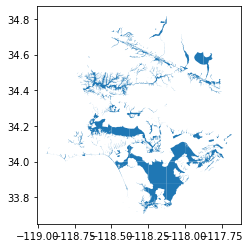

In [272]:
liquefaction.plot()

<AxesSubplot:>

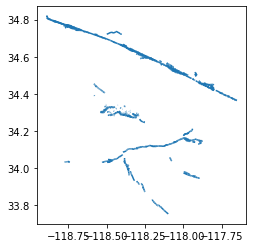

In [273]:
fault_trace.plot()

In [274]:
# I will exclude all the unincorporated 'neighbourhoods' of LA
# I used .head() here to make sure the file is not too long to read.
la_neighbourhoods["name"].head()

0              Acton
1    Adams-Normandie
2       Agoura Hills
3         Agua Dulce
4           Alhambra
Name: name, dtype: object

In [275]:
exclude = la_neighbourhoods[
    la_neighbourhoods["name"].str.contains("Unincorporated", case=False)
]
final_la_hoods = la_neighbourhoods[~la_neighbourhoods["name"].isin(exclude["name"])]

# IT WORKS!

#### PART III: Aggregation and Further Analysis

##### *STARTING WITH THE CONCRETE BUILDINGS DATASET*

In [276]:
concrete_buildings.head()

,num,lat,lon,address,zip_code,building_name,occupancy,code,stories,yrblt,sqft,hazus,level,bldvalue,adjvalue,multiplier,contents,combined,day,night,assessor,Type,Update
0,1,34.03616,-118.26004,100 E PICO BLVD,90015,NaN,Industrial,IND2,2,1946.0,12690,C2L,PC,936776,2402362,1.5,3603542,6005904,63,4,C5B,NaN,NaN
1,2,34.03134,-118.22999,1000 S SANTA FE AVE,90021,NaN,Industrial,IND2,5,1917.0,62060,C2M,PC,4878537,12511007,1.5,18766511,31277518,310,19,CX,NaN,NaN
2,3,34.03594,-118.25172,1001 S SAN PEDRO ST,90015,NaN,Industrial,COM2,2,1909.0,9516,C2L,PC,538415,1380766,1.0,1380766,2761532,10,0,CX,NaN,NaN
3,4,34.03594,-118.25172,1001 S SAN PEDRO ST,90015,NaN,Industrial,COM2,2,1911.0,9764,C2L,PC,552447,1416751,1.0,1416751,2833501,10,0,CX,NaN,NaN
4,5,34.03594,-118.25172,1001 S SAN PEDRO ST,90015,NaN,Industrial,COM2,2,1914.0,14120,C2L,PC,798910,2048804,1.0,2048804,4097607,14,0,CX,NaN,NaN


In [302]:
# Grouping by zipcode
conc_zipcode = (
    concrete_buildings.groupby("zip_code")
    .agg({"num": "count"})
    .reset_index()
    .rename(columns={"num": "conc_buildings"})
    .sort_values("conc_buildings", ascending=False)
)

In [278]:
conc_zipcode.head()

,zip_code,conc_buildings
12,90014,109
13,90015,99
11,90013,88
25,90028,80
19,90021,62


In [279]:
# I am converting my zipcode to a string because it will make the merges with the shapefile easier
# Removing the decimal points because that will hinder the merge.

conc_zipcode["zip_code"] = (
    conc_zipcode["zip_code"].astype(str).apply(lambda x: x.replace(".0", ""))
)

conc_zipcode.dtypes

zip_code          object
conc_buildings     int64
dtype: object

In [280]:
# Find out the length of the dataset
row_no = len(concrete_buildings)
print(f"The number of buildings in the dataset are {row_no}.")

The number of buildings in the dataset are 1451.


In [281]:
concrete_buildings["occupancy"].unique()

array(['Industrial', 'Commercial', 'School', 'Office', 'Warehouse',
       'Nursing home', 'Hotel', 'INSTITUTIONAL', 'Shopping Mall',
       'Residential', 'Lifeline', 'Theatre', 'Church',
       'Residential/Condo', 'Recreation', 'Hospital',
       'Professional building', 'Parking structure', 'Office/non profit',
       'Bank', 'Utilities', 'Office/parking mix', 'Movie Studio',
       'Children day care', 'Health Clinic', 'Religious', 'Store/combo',
       'Industrial/Comercial', 'Residential/condo', 'Government',
       'Nursing Home', 'police and fire station', 'Office/Non profit',
       'Convent', 'services', nan, 'Market', 'Health clinic', 'Mortuary',
       'Museum', 'Movie Theatre', 'Restaurant',
       'High and open first floor', 'Commercial/res mix',
       'Theater/auditorium', 'Commercial/residential mix',
       'Manufacturing', 'Comm/Entertainment mix', 'Comm/residential mix',
       'Club/Lodge'], dtype=object)

In [282]:
# I want to find the number of solely residential buildings that are in danger from earthquakes
conc_residential = concrete_buildings[concrete_buildings["occupancy"] == "Residential"]
print(
    f"The number of residential buildings in danger from earthquakes are {len(conc_residential)}."
)

The number of residential buildings in danger from earthquakes are 122.


In [303]:
# Grouping by the HAZUS classification.
hazus_classify = concrete_buildings.groupby("hazus").agg({"num": "count"}).reset_index()
hazus_classify

,hazus,num
0,C2H,43
1,C2L,513
2,C2M,136
3,C3H,174
4,C3L,396
5,C3M,189


##### *LOOKING AT SOFT STORY CONDOS AND SOFT STORY APARTMENTS*

In [304]:
# Grouping by zipcode
ss_condo_zipcode = (
    ss_condo.groupby("ZIP_CODE")
    .agg({"LOG_ID": "count"})
    .reset_index()
    .rename(columns={"LOG_ID": "ss_condos"})
    .sort_values("ss_condos", ascending=False)
)

In [285]:
# I am converting my zipcode to a string because it will make the merges with the shapefile easier
# Removing the decimal points because that will hinder the merge.

ss_condo_zipcode["ZIP_CODE"] = (
    ss_condo_zipcode["ZIP_CODE"].astype(str).apply(lambda x: x.replace(".0", ""))
)

In [286]:
ss_condo_zipcode.head()

,ZIP_CODE,ss_condos
26,90292,1290
48,91367,981
47,91356,877
37,91316,711
58,91504,696


In [305]:
# Grouping by zipcode
ss_apartment_zipcode = (
    ss_apartment.groupby("ZIP_CODE")
    .agg({"LOG_ID": "count"})
    .reset_index()
    .rename(columns={"LOG_ID": "ss_apartments"})
    .sort_values("ss_apartments", ascending=False)
)

In [288]:
# I am converting my zipcode to a string because it will make the merges with the shapefile easier
# Removing the decimal points because that will hinder the merge.

ss_apartment_zipcode["ZIP_CODE"] = (
    ss_apartment_zipcode["ZIP_CODE"].astype(str).apply(lambda x: x.replace(".0", ""))
)

ss_apartment_zipcode.head()

,ZIP_CODE,ss_apartments
27,90034,887
19,90025,746
28,90035,424
50,90066,404
15,90019,374


#### PART IV: Creating Charts with Altair

In [301]:
# Chart for Hazus Classification of Concrete Buildings
alt.Chart(hazus_classify).mark_bar(color="orange", size=30).encode(
    x=alt.X("hazus", title="Hazus Classification"),
    y=alt.Y("num", title="Number of concrete buildings"),
).properties(
    width=300,
    height=450,
    title="Hazus Classification of Concrete Buildings in Danger From Earthquakes",
)
# The highest number of buildings belong to C2L, which according to the classification are the safest. Yay!
# There are more smaller buildings than taller which makes sense.
# However, a significant number of buildings belong to C3H (~170), which is the classification most at risk.
# Those I would recommend be retrofitted enough to avoid disaster and high damages.

alt.Chart(...)

In [310]:
# I do not like this chart, but I have it here just to visualize the data in chart form.
# I will visualize it again in map form.
# Chart for Soft Story Condos At Risk From Earthquakes
alt.Chart(ss_condo_zipcode).mark_bar(color="blue", size=10).encode(
    x=alt.X("ZIP_CODE:N", title="Zipcode"),
    y=alt.Y("ss_condos", title="Number of soft story condos"),
).properties(
    width=1000, height=450, title="Soft Story Condos At Risk From Earthquakes",
)
# Zipcodes at most risk are 90292: Marina Del Rey!
# @ Prof. Stiles: stay safe!

alt.Chart(...)

In [313]:
# I do not like this chart, but I have it here just to visualize the data in chart form.
# I will visualize it again in map form.
# Chart for Soft Story Apartments At Risk From Earthquakes
alt.Chart(ss_apartment_zipcode).mark_bar(color="purple", size=10).encode(
    x=alt.X("ZIP_CODE:N", title="Zipcode"),
    y=alt.Y("ss_apartments", title="Number of soft story condos"),
).properties(
    width=1200, height=450, title="Soft Story Apartments At Risk From Earthquakes",
)

# Zipcodes at most risk are 90034: Palms (has a high hispanic population)
# And 90025: West LA, Century City, South Westwood (which has a higher White population)

alt.Chart(...)

#### PART V: Preparing dataframes for Mapping

In [292]:
conc_zipcode_la = pd.merge(
    la_zipcodes, conc_zipcode, left_on="zipcode", right_on="zip_code"
)

<AxesSubplot:>

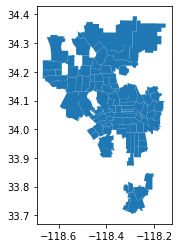

In [293]:
conc_zipcode_la.plot()

In [294]:
conc_zipcode_la.to_file(
    "../data/processed/los_angeles_conc_buildings_zipcode", driver="GeoJSON"
)

In [295]:
ss_apartments_la = pd.merge(
    la_zipcodes, ss_apartment_zipcode, left_on="zipcode", right_on="ZIP_CODE"
)

<AxesSubplot:>

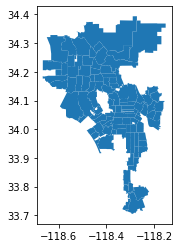

In [296]:
ss_apartments_la.plot()

In [297]:
ss_apartments_la.to_file(
    "../data/processed/los_angeles_ss_apartments_zipcode", driver="GeoJSON"
)

In [298]:
ss_condos_la = pd.merge(
    la_zipcodes, ss_condo_zipcode, left_on="zipcode", right_on="ZIP_CODE"
)

<AxesSubplot:>

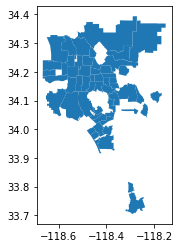

In [299]:
ss_condos_la.plot()

In [300]:
ss_condos_la.to_file(
    "../data/processed/los_angeles_ss_condos_zipcode", driver="GeoJSON"
)

#### PART VI: LINKS TO MAPS

##### DATAWRAPPER:

Income Distribution in Los Angeles: https://www.datawrapper.de/_/qrozz/

Maps Showing soft story apartments and condos, and concrete buildings in danger: attached to Blackboard submission.

#### PART VII: SHORT ANALYSIS OF THE MAPS

The labels in the maps are very disorienting and I don't like QGIS, but there was nothing else I could've done with the labels and those were necessary to make sense of the data. Ideally, I would not use QGIS but I had to, in this case, because I needed to somehow show my fault trace shapefiles and the liquefaction shapefiles with the rest of the data, which I could have only done here or on ArcMap or ArcGIS.

Professor Stiles, Marina Del Rey looks prone to liquefaction. CONSIDER MOVING!

What I found very alarming was that the southern and eastern part of LA county is prone to liquefaction. Those are the poorest areas of LA (according to my Datawrapper map) and also have the highest number of colored populations. 

Most soft story apartments and condos are in the Western parts of LA, which are relatively richer areas. So, we might expect a huge economic loss in case of an earthquake.

Most concrete buildings are in downtown and central LA, which is not a surprise. But these are also the areas that are significant to the economy of the city. So, these buildings would need to be reinforced if we want to avoid both loss of life and economy in the city in case of an earthquake.